In [1]:
### Show plots inline, and load main getdist plot module and samples class
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, loadMCSamples, MCSamples
import getdist
# use this *after* importing getdist if you want to use interactive plots
# %matplotlib notebook
import matplotlib.pyplot as plt
import IPython
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
# matplotlib 2 may not work very well without usetex on, can uncomment
# plt.rcParams['text.usetex']=True
from matplotlib import rc
import seaborn as sns
from scipy.constants import c
import numpy as np

GetDist Version: 1.4.1, Matplotlib version: 3.7.0


In [2]:
def get_limit(samples_A, param, limit=1, expected_marker="=", get_value=True, both=False ):

    if get_value==True:
        
        if both==False:
            if(expected_marker in samples_A.getInlineLatex(param, limit=limit)):
                return samples_A.getInlineLatex(param, limit=limit).split(expected_marker,1)[1];
            else:
                expected_marker= "<"
                if(expected_marker in samples_A.getInlineLatex(param,limit=limit)):
                    return "<"+samples_A.getInlineLatex(param, limit=limit).split(expected_marker,1)[1];
                else:
                    expected_marker= ">"
                    if(expected_marker in samples_A.getInlineLatex(param,limit=limit)):
                        return ">"+samples_A.getInlineLatex(param, limit=limit).split(expected_marker,1)[1];
                    
        if both==True:
            if(expected_marker in samples_A.getInlineLatex(param, limit=1)):
                if expected_marker in samples_A.getInlineLatex(param, limit=2):
                    return samples_A.getInlineLatex(param, limit=1).split(expected_marker,1)[1]+"\\, ("+samples_A.getInlineLatex(param, limit=2).split(expected_marker,1)[1]+" )";
                else:
                    expected_marker = "<"
                    if expected_marker in samples_A.getInlineLatex(param, limit=2):
                        return samples_A.getInlineLatex(param, limit=1).split("=",1)[1]+"\\, ("+"<"+samples_A.getInlineLatex(param, limit=2).split(expected_marker,1)[1]+" )";
                    else:
                        expected_marker = ">"
                        if expected_marker in samples_A.getInlineLatex(param, limit=2):
                            return samples_A.getInlineLatex(param, limit=1).split("=",1)[1]+"\\, ("+">"+samples_A.getInlineLatex(param, limit=2).split(expected_marker,1)[1]+" )";
                        
                    
            else:
                expected_marker= "<"
                if(expected_marker in samples_A.getInlineLatex(param,limit=limit)):
                    return "<"+samples_A.getInlineLatex(param, limit=1).split(expected_marker,1)[1]+"\\, ("+"<"+samples_A.getInlineLatex(param, limit=2).split(expected_marker,1)[1]+" )";
                else:
                    expected_marker= ">"
                    if(expected_marker in samples_A.getInlineLatex(param,limit=limit)):
                        return ">"+samples_A.getInlineLatex(param, limit=1).split(expected_marker,1)[1]+"\\, ("+">"+samples_A.getInlineLatex(param, limit=2).split(expected_marker,1)[1]+" )";
            
            
    
    else:
        if(expected_marker in samples_A.getInlineLatex(param,limit=limit)):
            return samples_A.getInlineLatex(param, limit=limit).split(expected_marker)[0]; 
        else:
            expected_marker= "<"
            if(expected_marker in samples_A.getInlineLatex(param,limit=limit)):
                return samples_A.getInlineLatex(param, limit=limit).split(expected_marker)[0];
            else:
                expected_marker= ">"
                if(expected_marker in samples_A.getInlineLatex(param,limit=limit)):
                    return samples_A.getInlineLatex(param, limit=limit).split(expected_marker)[0];

In [3]:
import re

def extract_central_values(data):
    # List to store the central values
    central_values = []

    for entry in data:
        # Use regex to match the central value (before ^{ or \pm)
        match = re.match(r'\s*(-?\d+\.\d+)', entry)
        if match:
            # Append the matched central value as a float
            central_values.append(float(match.group(1)))

    return central_values


def extract_errors(data):
    # List to store the errors as [plus, minus]
    errors = []

    for entry in data:
        # Check for errors in the form ^{+x}_{-y}
        match_plus_minus = re.search(r'\^\{\+([\d\.]+)\}_\{-([\d\.]+)\}', entry)
        if match_plus_minus:
            plus = float(match_plus_minus.group(1))
            minus = float(match_plus_minus.group(2))
            errors.append([plus, minus])
            continue

        # Check for errors in the form \pm x
        match_pm = re.search(r'\\pm\s*([\d\.]+)', entry)
        if match_pm:
            error = float(match_pm.group(1))
            errors.append([error, error])
            continue

        # If no error is found, append None
        errors.append(None)

    return errors

In [4]:
CMB='./CPL/CMB/CMB/chain_back/w0wa'
CMB_CC='./CPL/CMB/CMB_CC/chain_back/w0wa'
CMB_DESI='./CPL/CMB/CMB_DESI/chain_back/w0wa'
CMB_DESI_CC='./CPL/CMB/CMB_DESI_CC/chain_back/w0wa'
CMB_DESI_DESY5='./CPL/CMB/CMB_DESI_DESY5/chain_back/w0wa'
CMB_DESI_DESY5_CC='./CPL/CMB/CMB_DESI_DESY5_CC/chain_back/w0wa'
CMB_DESI_PP='./CPL/CMB/CMB_DESI_PP/chain_back/w0wa'
CMB_DESI_PP_CC='./CPL/CMB/CMB_DESI_PP_CC/chain_back/w0wa'
CMB_DESI_U3='./CPL/CMB/CMB_DESI_U3/chain_back/w0wa'
CMB_DESI_U3_CC='./CPL/CMB/CMB_DESI_U3_CC/chain_back/w0wa'
CMB_DESY5='./CPL/CMB/CMB_DESY5/chain_back/w0wa'
CMB_PP='./CPL/CMB/CMB_PP/chain_back/w0wa'
CMB_SDSS='./CPL/CMB/CMB_SDSS/chain_back/w0wa'
CMB_SDSS_CC='./CPL/CMB/CMB_SDSS_CC/chain_back/w0wa'
CMB_SDSS_DESY5='./CPL/CMB/CMB_SDSS_DESY5/chain_back/w0wa'
CMB_SDSS_DESY5_CC='./CPL/CMB/CMB_SDSS_DESY5_CC/chain_back/w0wa'
CMB_SDSS_PP='./CPL/CMB/CMB_SDSS_PP/chain_back/w0wa'
CMB_SDSS_PP_CC='./CPL/CMB/CMB_SDSS_PP_CC/chain_back/w0wa'
CMB_SDSS_U3='./CPL/CMB/CMB_SDSS_U3/chain_back/w0wa'
CMB_SDSS_U3_CC='./CPL/CMB/CMB_SDSS_U3_CC/chain_back/w0wa'
CMB_U3='./CPL/CMB/CMB_U3/chain_back/w0wa'
DESI_CC='./CPL/Background/DESI_CC/chain_back/w0wa'
DESI_DESY5='./CPL/Background/DESI_DESY5/chain_back/w0wa'
DESI_DESY5_CC='./CPL/Background/DESI_DESY5_CC/chain_back/w0wa'
DESI_PP='./CPL/Background/DESI_PP/chain_back/w0wa'
DESI_PP_CC='./CPL/Background/DESI_PP_CC/chain_back/w0wa'
DESI_U3='./CPL/Background/DESI_U3/chain_back/w0wa'
DESI_U3_CC='./CPL/Background/DESI_U3_CC/chain_back/w0wa'
SDSS_CC='./CPL/Background/SDSS_CC/chain_back/w0wa'
SDSS_DESY5='./CPL/Background/SDSS_DESY5/chain_back/w0wa'
SDSS_DESY5_CC='./CPL/Background/SDSS_DESY5_CC/chain_back/w0wa'
SDSS_PP='./CPL/Background/SDSS_PP/chain_back/w0wa'
SDSS_PP_CC='./CPL/Background/SDSS_PP_CC/chain_back/w0wa'
SDSS_U3='./CPL/Background/SDSS_U3/chain_back/w0wa'
SDSS_U3_CC='./CPL/Background/SDSS_U3_CC/chain_back/w0wa'

In [5]:
roots=[ 
DESI_PP,
SDSS_PP,
DESI_DESY5,
SDSS_DESY5,
DESI_U3, 
SDSS_U3,
CMB_PP,
CMB_U3,
CMB_DESY5,   
CMB_DESI,
CMB_SDSS,
CMB_DESI_PP,
CMB_SDSS_PP,
CMB_DESI_DESY5,
CMB_SDSS_DESY5,
CMB_DESI_U3,
CMB_SDSS_U3,
]

chains=[0]*len(roots)

for i in range(len(roots)):
    
    chains[i]=getdist.loadMCSamples(roots[i], settings={'ignore_rows':0.3});

In [7]:
print('omegam=[')
for k in range(len(chains)):
    print('\'',get_limit(chains[k],'omegam'),'\'', end=' ,')
print(']')

omegam=[
'  0.299^{+0.036}_{-0.013} ' ,'  0.291^{+0.022}_{-0.024} ' ,'  0.323^{+0.022}_{-0.013} ' ,'  0.307^{+0.027}_{-0.022} ' ,'  0.327^{+0.023}_{-0.014} ' ,'  0.309\pm 0.024 ' ,'  0.310^{+0.013}_{-0.015} ' ,'  0.319\pm 0.013 ' ,'  0.3150^{+0.0094}_{-0.011} ' ,'  0.326^{+0.026}_{-0.021} ' ,'  0.322\pm 0.019 ' ,'  0.3089\pm 0.0067 ' ,'  0.3154\pm 0.0068 ' ,'  0.3156\pm 0.0065 ' ,'  0.3215\pm 0.0064 ' ,'  0.3225\pm 0.0094 ' ,'  0.3264\pm 0.0089 ' ,]


In [8]:
omegam=[
'  0.299^{+0.036}_{-0.013} ' ,'  0.291^{+0.022}_{-0.024} ' ,'  0.323^{+0.022}_{-0.013} ' ,'  0.307^{+0.027}_{-0.022} ' ,'  0.327^{+0.023}_{-0.014} ' ,'  0.309\pm 0.024 ' ,'  0.310^{+0.013}_{-0.015} ' ,'  0.319\pm 0.013 ' ,'  0.3150^{+0.0094}_{-0.011} ' ,'  0.326^{+0.026}_{-0.021} ' ,'  0.322\pm 0.019 ' ,'  0.3089\pm 0.0067 ' ,'  0.3154\pm 0.0068 ' ,'  0.3156\pm 0.0065 ' ,'  0.3215\pm 0.0064 ' ,'  0.3225\pm 0.0094 ' ,'  0.3264\pm 0.0089 ']



In [9]:
datasets=[
"DESI+PP",
"SDSS+PP",
"DESI+DESY5",
"SDSS+DESY5",
"DESI+U3", 
"SDSS+U3",
"CMB+PP",
"CMB+U3",
"CMB+DESY5",   
"CMB+DESI",
"CMB+SDSS",
"CMB+DESI+PP",
"CMB+SDSS+PP",
"CMB+DESI+DESY5",
"CMB+SDSS+DESY5",
"CMB+DESI+U3",
"CMB+SDSS+U3",
]

values_omegam=extract_central_values(omegam)
errors_omegam=extract_errors(omegam)

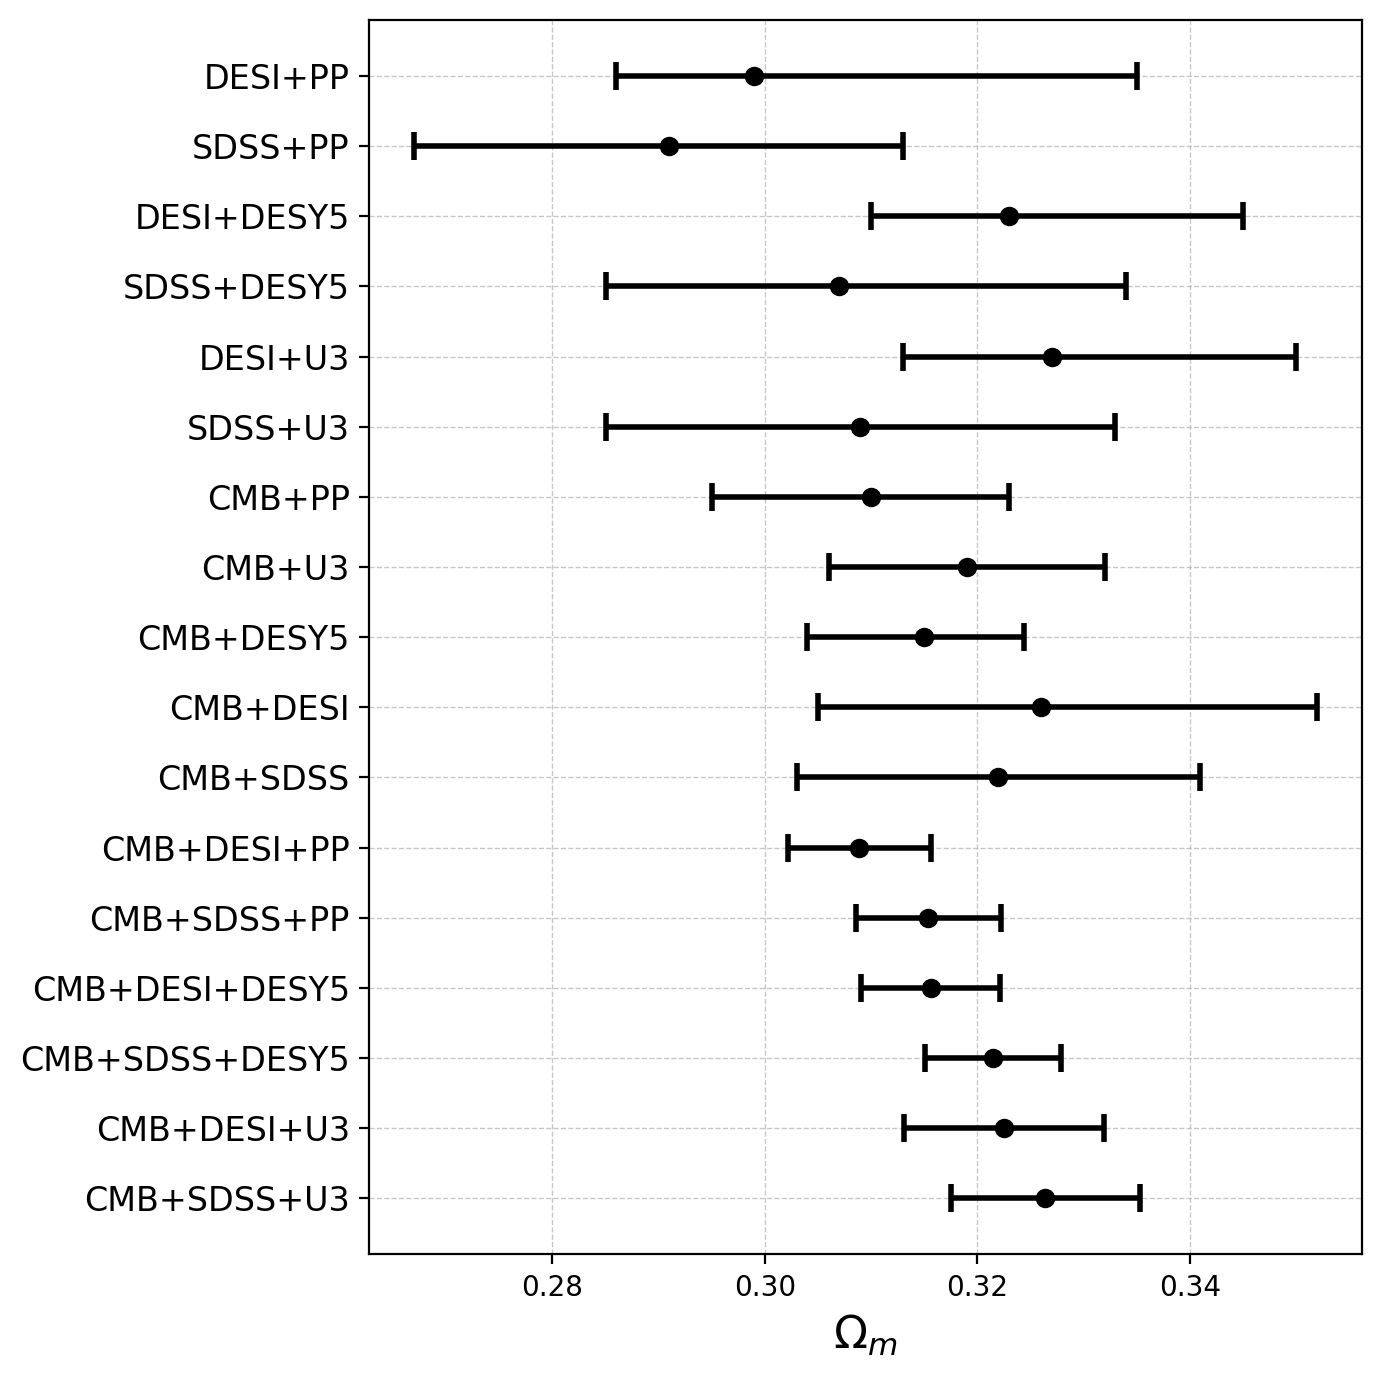

In [17]:
# Creating the plot
fig, ax = plt.subplots(figsize=(7, 7))
y_pos = np.arange(len(datasets))

# Plotting each dataset
for i, (value, err) in enumerate(zip(values_omegam, errors_omegam)):
    ax.errorbar(
        x=value, y=i, xerr=[[err[1]], [err[0]]], fmt='o',
        alpha=1, color="k", capsize=5, capthick=2, linestyle="none", linewidth=2
    )

# Customizing the plot
#ax.set_xlim(-1.2, -0.33)
ax.set_yticks(y_pos)
ax.set_yticklabels(datasets, fontsize=12)
ax.set_xlabel(r'$\Omega_m$', fontsize=16)
ax.invert_yaxis()  # Invert the y-axis to match the dataset order
ax.grid(linestyle='--', linewidth=0.5, alpha=0.7)
#ax.axvline(-1, lw=1, ls='--', c='k')  # Reference line for $w_0 = -1$
plt.tight_layout()
#plt.show()
plt.savefig('Omegam.pdf')